In [1]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

/Users/admin/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def sigmoid(u):
    return 1 / (1 + np.exp(-u))

def softmax(u):
    e = np.exp(u)
    a=np.repeat(np.sum(e,axis=1).reshape(len(e),1),3,axis=1)
    return e / a

def forward(x):
    global W1
    global W2
    u1 = x.dot(W1)
    z1 = sigmoid(u1)
    u2 = z1.dot(W2)
    y = softmax(u2)
    return y, z1

def back_propagation(x, z1, y, d):
    global W1
    global W2
    delta2 = y - d
    grad_W2 = z1.T.dot(delta2)

    sigmoid_dash = z1 * (1 - z1)
    delta1 = delta2.dot(W2.T) * sigmoid_dash
    grad_W1 = x.T.dot(delta1)

    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1

In [3]:
iris = load_iris()
x=pd.DataFrame(iris.data, columns=iris.feature_names).values
y=iris.target
y=y.reshape(-1,1)
ohe=OneHotEncoder()
y=ohe.fit_transform(y).toarray()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [4]:
W1 = np.random.rand(4,3)
W2 = np.random.rand(3,3)
learning_rate = 0.0005

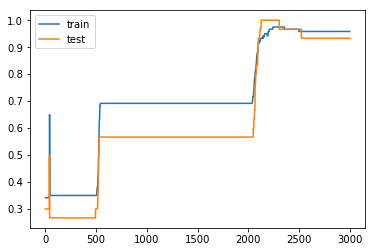

In [5]:
acc_train_list=[]
acc_test_list=[]
for k in range(3000):
    # 順伝播
    y, z1 = forward(x_train)

    # 誤差逆伝播
    back_propagation(x_train, z1, y, y_train)

    
    ans=np.argmax(y,axis=1)
    true=np.argmax(y_train,axis=1)
    acc_train=1.0*np.sum(ans==true)/len(ans)
    acc_train_list.append(acc_train)
    #print('train_acc_{0}'.format(acc_train))

    y, z1 = forward(x_test)
    ans=np.argmax(y,axis=1)
    true=np.argmax(y_test,axis=1)
    acc_test=1.0*np.sum(ans==true)/len(ans)
    #print('test_acc_{0}'.format(acc_test))
    acc_test_list.append(acc_test)

plt.plot(acc_train_list,label='train')
plt.plot(acc_test_list,label='test')
plt.legend()